<a href="https://colab.research.google.com/github/SirishaN123/SCT_DS_1/blob/main/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import time
from datetime import date

%matplotlib inline

def fetch_stock_data(symbol, start_date, end_date):
    stock = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)
    return stock

def plot_stock_data(stock, symbol):
    plt.figure(figsize=(10,5))
    plt.plot(stock.index, stock["Close"], label=f"{symbol} Closing Price", color="blue")
    plt.title(f"{symbol} Stock Price History")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

def live_price_alert(symbol, target_price, checks=5, delay=30):
    print(f"📡 Monitoring {symbol} for {checks} checks... Alert if price > {target_price}")
    for _ in range(checks):
        stock = yf.Ticker(symbol)
        price = stock.history(period="1d")["Close"].iloc[-1]
        print(f"Current Price: ${price:.2f}")
        if price > target_price:
            print(f"🚨 ALERT! {symbol} price crossed ${target_price}")
            break
        time.sleep(delay)

Dropdown(description='Stock:', options=('AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMZN', 'NVDA'), style=DescriptionSty…

DatePicker(value=datetime.date(2024, 1, 1), description='Start Date')

DatePicker(value=datetime.date(2025, 8, 15), description='End Date')

FloatText(value=200.0, description='Target Price:', style=DescriptionStyle(description_width='initial'))

Checkbox(value=False, description='Enable Price Alert')

Button(button_style='success', description='Fetch & Plot', icon='line-chart', style=ButtonStyle(), tooltip='Cl…

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081497,186.857993,182.346189,185.578815,82488700
2024-01-03,182.703171,184.319491,181.890048,182.673424,58414500
2024-01-04,180.382828,181.552914,179.361476,180.620803,71983600
2024-01-05,179.658951,181.225688,178.657435,180.462163,62379700
2024-01-08,184.002167,184.041839,179.976254,180.561297,59144500


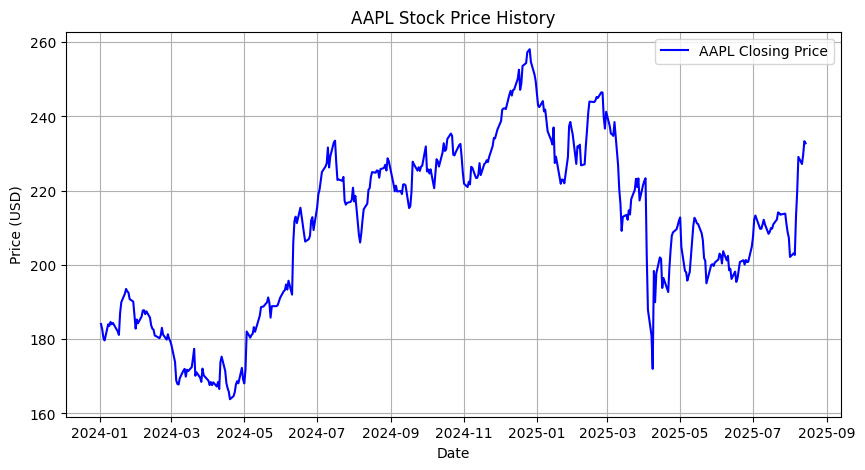

📡 Monitoring AAPL for 5 checks... Alert if price > 200.0
Current Price: $232.20
🚨 ALERT! AAPL price crossed $200.0


In [ ]:
# Stock dropdown
stock_dropdown = widgets.Dropdown(
    options=['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMZN', 'NVDA'],
    value='AAPL',
    description='Stock:',
    style={'description_width': 'initial'}
)

# Date pickers
start_picker = widgets.DatePicker(
    description='Start Date',
    disabled=False,
    value=date(2024, 1, 1)
)

end_picker = widgets.DatePicker(
    description='End Date',
    disabled=False,
    value=date.today()
)

# Target price input
target_price_input = widgets.FloatText(
    value=200.0,
    description='Target Price:',
    style={'description_width': 'initial'}
)

# Alert toggle
alert_toggle = widgets.Checkbox(
    value=False,
    description='Enable Price Alert'
)

# Run button
run_button = widgets.Button(
    description='Fetch & Plot',
    button_style='success',
    tooltip='Click to fetch data and plot chart',
    icon='line-chart'
)

# Action on button click
def on_button_click(b):
    symbol = stock_dropdown.value
    start_date = start_picker.value.strftime('%Y-%m-%d')
    end_date = end_picker.value.strftime('%Y-%m-%d')

    data = fetch_stock_data(symbol, start_date, end_date)
    if data.empty:
        print("❌ No data found. Please check the inputs.")
    else:
        display(data.head())
        plot_stock_data(data, symbol)

        if alert_toggle.value:
            target_price = target_price_input.value
            live_price_alert(symbol, target_price, checks=5, delay=30)

run_button.on_click(on_button_click)

# Display all widgets
display(stock_dropdown, start_picker, end_picker, target_price_input, alert_toggle, run_button)